## bar 차트 기본 사용

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 사용

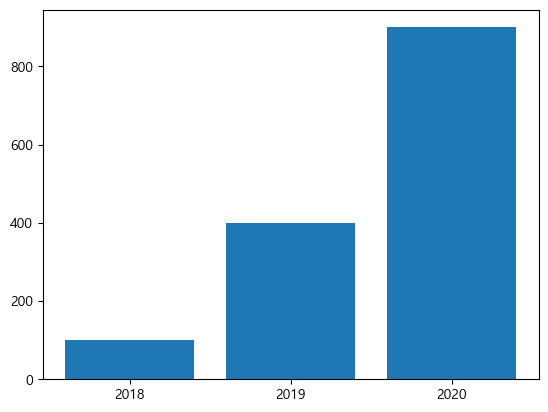

In [10]:
# 보여줄 bar의 인덱스 생성
x = np.arange(3)
#  소스: Wide 포맷의 데이터
years = ['2018', '2019', '2020']
# bar에 매칭이 되는 값 리스트 생성
# 2018년 누적된 레코드 결과가 100건이라는 의미 실제 데이터는 2018년 관련 레코드가 100건이 있다는 의미
# 2019년도, 2020년도는 각각 400건, 900건이 있다는 의미
values = [100, 400, 900]

plt.bar(x, values)
plt.xticks(x, years)

plt.show()

* 예상되는 원본데이터(long형) 형태

In [4]:
# 원본 데이터프레임 생성
data = {
    '연식': ['2018', '2018', '2018', '2019', '2019', '2019', '2019', '2020', '2020', '2020', '2020']
}

df = pd.DataFrame(data)
df

,연식
0,2018
1,2018
2,2018
3,2019
4,2019
5,2019
6,2019
7,2020
8,2020
9,2020


In [5]:
df['연식'].value_counts()

연식
2019    4
2020    4
2018    3
Name: count, dtype: int64

In [6]:
# value_counts() 함수를 사용하여 각 연도에 해당하는 값의 개수 계산
value_counts = df['연식'].value_counts().sort_index()
value_counts

연식
2018    3
2019    4
2020    4
Name: count, dtype: int64

In [7]:
# 막대 그래프 그리기
years = value_counts.index.tolist()
years

['2018', '2019', '2020']

In [8]:
values = value_counts.values
values

array([3, 4, 4], dtype=int64)

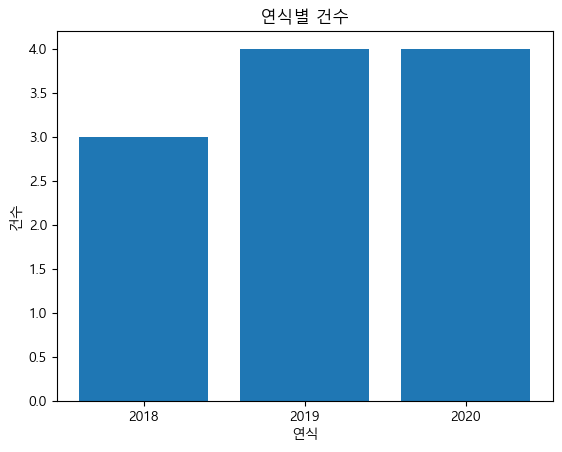

In [9]:
x = np.arange(len(years))

plt.bar(x, values)
plt.xticks(x, years)
plt.xlabel('연식')
plt.ylabel('건수')
plt.title('연식별 건수')

plt.show()

## 실데이터 연습

In [13]:
book = pd.read_csv('book_data.csv', encoding='cp949')
book.head()

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
0,올 더 빌딩스 인 런던,제임스 걸리버 핸콕,2018-08-25,"14,400",양장본,140,225*280mm,476,예술/대중문화,책발전소,110
1,렛 잇 블리드,이언 랜킨,2018-08-19,"13,320",반양장본,476,128*188mm,476,소설/시/희곡,오픈하우스,110
2,은유로 사회 읽기,대니얼 리그니,2018-08-20,"39,500",양장본,416,152*223mm,749,사회과학,한울(한울아카데미),10
3,유럽 맥주 여행,백경학,2018-08-24,"14,400",반양장본,308,150*220mm,400,역사,글항아리,10
4,"이게, 행복이 아니면 무엇이지",김혜령,2018-08-20,"13,050",NaN,288,135*200mm,374,인문학,웨일북,10


In [14]:
book.book_cover.unique()

array(['양장본', '반양장본', nan], dtype=object)

In [21]:
book['book_cover'] = book['book_cover'].fillna('미정의')
book.head()

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
0,올 더 빌딩스 인 런던,제임스 걸리버 핸콕,2018-08-25,"14,400",양장본,140,225*280mm,476,예술/대중문화,책발전소,110
1,렛 잇 블리드,이언 랜킨,2018-08-19,"13,320",반양장본,476,128*188mm,476,소설/시/희곡,오픈하우스,110
2,은유로 사회 읽기,대니얼 리그니,2018-08-20,"39,500",양장본,416,152*223mm,749,사회과학,한울(한울아카데미),10
3,유럽 맥주 여행,백경학,2018-08-24,"14,400",반양장본,308,150*220mm,400,역사,글항아리,10
4,"이게, 행복이 아니면 무엇이지",김혜령,2018-08-20,"13,050",미정의,288,135*200mm,374,인문학,웨일북,10


In [22]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   book_name       2000 non-null   object
 1   book_writer     2000 non-null   object
 2   book_date       2000 non-null   object
 3   book_price      2000 non-null   object
 4   book_cover      2000 non-null   object
 5   book_page       2000 non-null   object
 6   book_size       1999 non-null   object
 7   book_weight     2000 non-null   int64 
 8   book_category   2000 non-null   object
 9   book_publisher  2000 non-null   object
 10  sales_point     2000 non-null   object
dtypes: int64(1), object(10)
memory usage: 172.0+ KB


In [30]:
book['book_cover'].value_counts()

book_cover
반양장본    1236
양장본      447
미정의      317
Name: count, dtype: int64

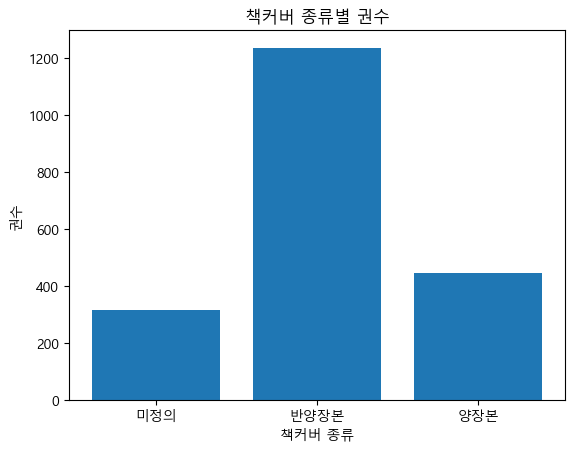

In [64]:
# value_counts() 함수를 사용하여 각 연도에 해당하는 값의 계수 계산
value_counts = book['book_cover'].value_counts().sort_index()
# 막대 그래프 그리기
cover_categories =value_counts.index.tolist()
values = value_counts.values
x = np.arange(len(cover_categories))

plt.bar(x, values)
plt.xticks(x, cover_categories)
plt.xlabel('책커버 종류')
plt.ylabel('권수')
plt.title('책커버 종류별 권수')

plt.show()

In [72]:
capacity = pd.read_csv('airplane_info.csv', encoding='cp949')
capacity.head()

,기체번호,항공사,기종,정원_F,정원_C,정원_W,정원_Y,총정원
0,VP-BDK,Aeroflot,A320-214,0,20,0,120,140.0
1,VP-BWD,Aeroflot,A320-214,0,20,0,120,140.0
2,VP-BWE,Aeroflot,A320-214,0,20,0,120,140.0
3,VP-BWF,Aeroflot,A320-214,0,20,0,120,140.0
4,VP-BRZ,Aeroflot,A320-214,0,20,0,120,140.0


In [73]:
capacity.정원_F.unique()

array([ 0, 12,  4,  6,  8], dtype=int64)

In [74]:
capacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기체번호    2178 non-null   object 
 1   항공사     2178 non-null   object 
 2   기종      2178 non-null   object 
 3   정원_F    2178 non-null   int64  
 4   정원_C    2178 non-null   int64  
 5   정원_W    2178 non-null   int64  
 6   정원_Y    2178 non-null   int64  
 7   총정원     2107 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 136.3+ KB


In [75]:
capacity['정원_F'].value_counts()

정원_F
0     2114
6       25
4       18
8       15
12       6
Name: count, dtype: int64

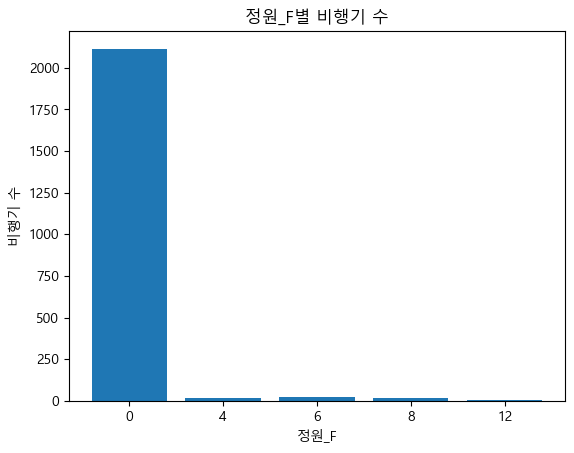

In [76]:
# value_counts() 함수를 사용하여 각 연도에 해당하는 값의 계수 계산
value_counts = capacity['정원_F'].value_counts().sort_index()
# 막대 그래프 그리기
capacity =value_counts.index.tolist()
values = value_counts.values
x = np.arange(len(capacity))

plt.bar(x, values)
plt.xticks(x, capacity)
plt.xlabel('정원_F')
plt.ylabel('비행기 수')
plt.title('정원_F별 비행기 수')

# plt.axis('scaled')

plt.show()

### 색상 지정하기

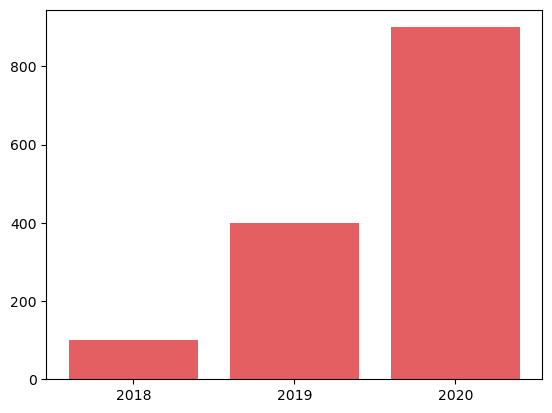

In [6]:
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

# plt.bar(x, values, color='y')
#plt.bar(x, values, color='dodgerblue')
plt.bar(x, values, color='#e35f62')
plt.xticks(x, years)

plt.show()

### 바마다 개별 색 지정

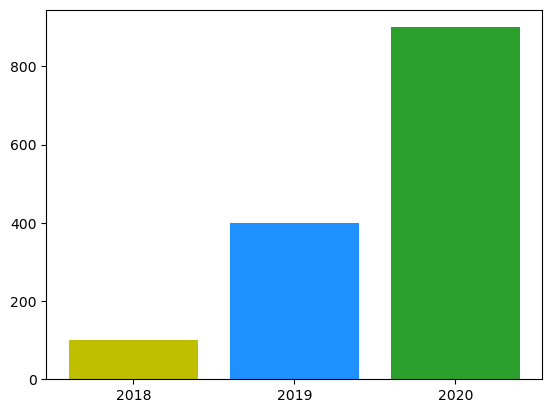

In [4]:
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]
colors = ['y', 'dodgerblue', 'C2']

# 색상이름을 리스트로 지정하면 순서대로 바에 할당
plt.bar(x, values, color=colors)
plt.xticks(x, years)

plt.show()

In [ ]:
# plot 차트에서 적용해 봤던 다양한 색상을 적용해 보세요

### 막대 폭 지정하기

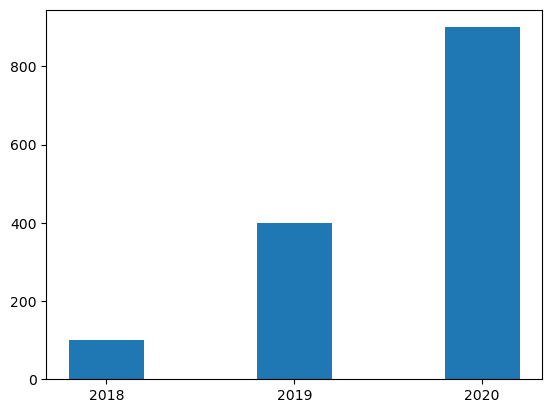

In [5]:
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.bar(x, values, width=0.4)
# plt.bar(x, values, width=0.6)
# plt.bar(x, values, width=0.8)
# plt.bar(x, values, width=1.0)
plt.xticks(x, years)

plt.show()

### 스타일 꾸미기

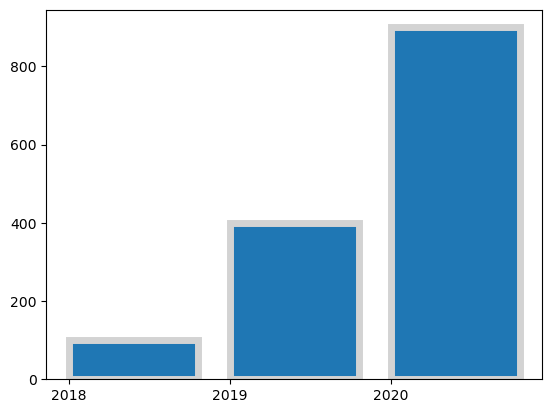

In [7]:
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.bar(x, values, align='edge', edgecolor='lightgray',
        linewidth=5, tick_label=years)

plt.show()

## 수평 막대 그래프 그리기

### 기본 사용 (barh 함수 활용)

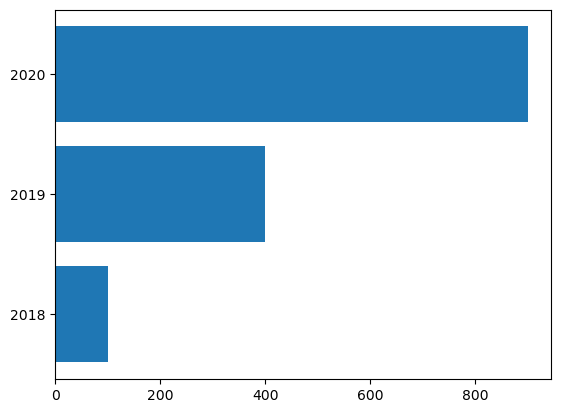

In [9]:
y = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.barh(y, values)
plt.yticks(y, years)

plt.show()

### 색상지정하기

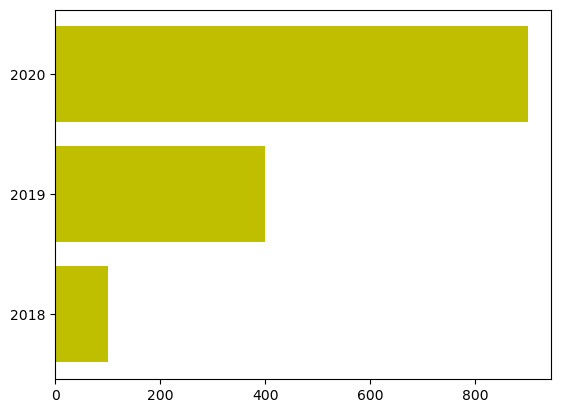

In [10]:
y = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.barh(y, values, color='y')
# plt.barh(y, values, color='dodgerblue')
# plt.barh(y, values, color='C2')
# plt.barh(y, values, color='#e35f62')
plt.yticks(y, years)

plt.show()

### 색상 개별 지정

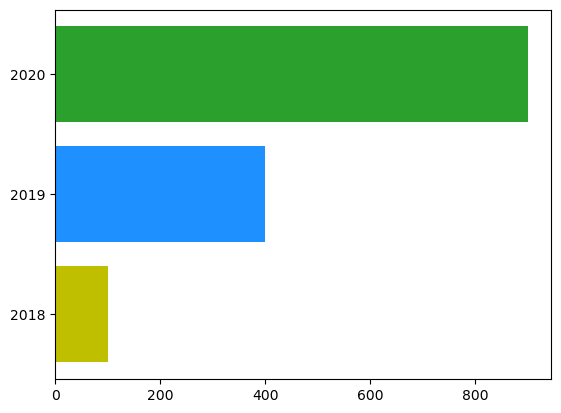

In [11]:
y = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]
colors = ['y', 'dodgerblue', 'C2']

plt.barh(y, values, color=colors)
plt.yticks(y, years)

plt.show()

### 막대 위치 지정

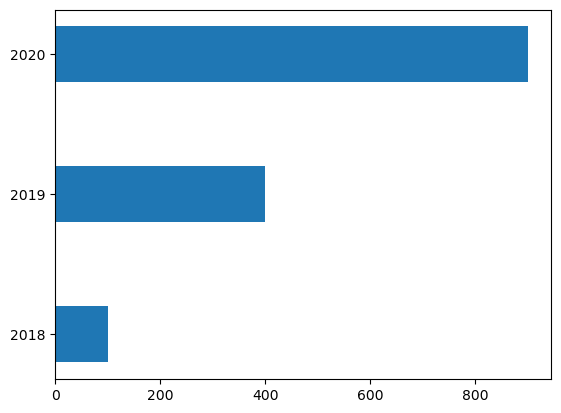

In [12]:
y = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.barh(y, values, height=0.4)
# plt.barh(y, values, height=0.6)
# plt.barh(y, values, height=0.8)
# plt.barh(y, values, height=1.0)
plt.yticks(y, years)

plt.show()

### 스타일 꾸미기

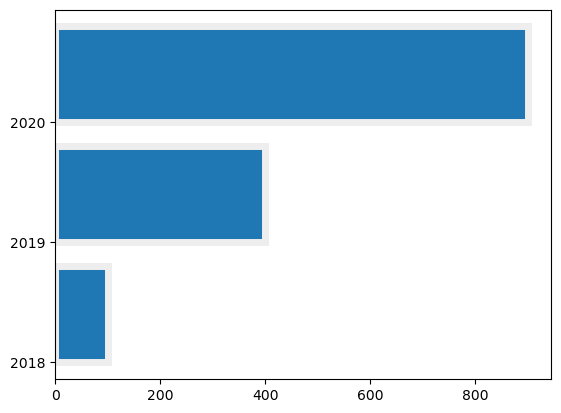

In [13]:
y = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.barh(y, values, align='edge', edgecolor='#eee',
         linewidth=5, tick_label=years)

plt.show()

### 막대차트에 값표시

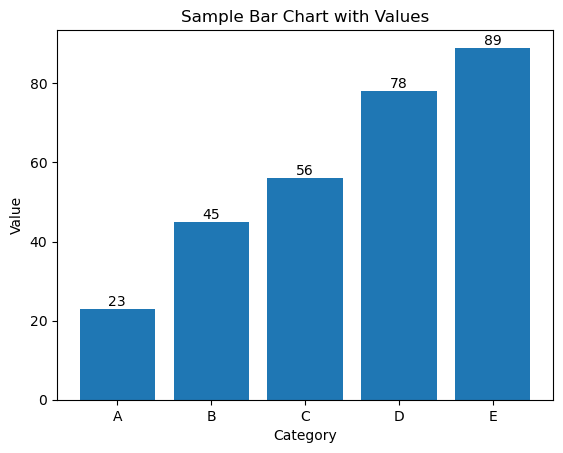

In [1]:
import matplotlib.pyplot as plt

# 데이터
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 78, 89]

# 막대 그래프 생성
# fig: 그림, ax: 축 객체
fig, ax = plt.subplots()
bars = ax.bar(categories, values)

# 각 막대 위에 값 표시
ax.bar_label(bars, fmt='%d', label_type='edge')

# 그래프 제목 및 레이블 설정
ax.set_title('Sample Bar Chart with Values')
ax.set_xlabel('Category')
ax.set_ylabel('Value')

# 그래프 표시
plt.show()

* bar 정중앙에 값 표시

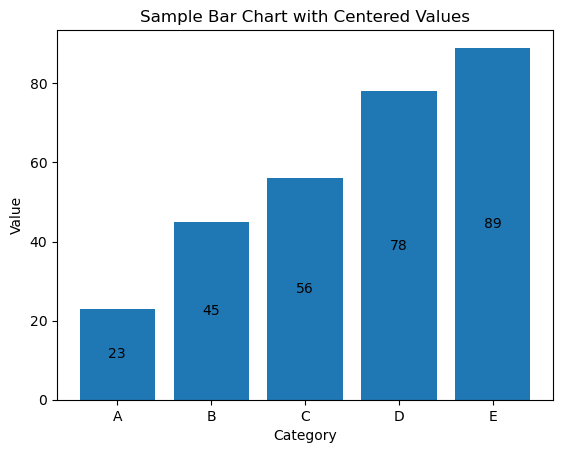

In [3]:
import matplotlib.pyplot as plt

# 데이터
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 78, 89]

# 막대 그래프 생성
fig, ax = plt.subplots()
bars = ax.bar(categories, values)

# 각 막대 내부의 정중앙에 값 표시
ax.bar_label(bars, fmt='%d', label_type='center', padding=0)

# 그래프 제목 및 레이블 설정
ax.set_title('Sample Bar Chart with Centered Values')
ax.set_xlabel('Category')
ax.set_ylabel('Value')

# 그래프 표시
plt.show()